# Test `baynes_sound_agrif` Module

Render figure object produced by the `nowcast.figures.research.baynes_sound_agrif` module.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker
to help ensure that the module will work in the nowcast production context.

This notebook must be run in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
Also, it must be run on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [2]:
# reload lets us pull in changes from modules that we edit
from importlib import reload

In [3]:
from pathlib import Path
import sys

import arrow

from nowcast.figures.research import baynes_sound_agrif

/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/tidetools.py:1569: SyntaxWarning: invalid escape sequence '\*'
  """Function for the fit, assuming only 4 constituents of importance are:
/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/tidetools.py:1608: SyntaxWarning: invalid escape sequence '\*'
  """Function for the fit, assuming 6 constituents of importance are:
/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/tidetools.py:1653: SyntaxWarning: invalid escape sequence '\*'
  """Function for the fit, for all the constituents: M2, K2, S1, O1, N2, P1,


In [4]:
import io

import yaml

Python and library versions:

In [5]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:36:51) [GCC 12.4.0]'
numpy.__version__='1.26.4'
xarray.__version__='2024.6.0'
bottleneck.__version__='1.4.0'
h5netcdf.__version__='1.3.0'
h5py.__version__='3.11.0'
matplotlib.__version__='3.9.2'
cmocean.__version__='v3.0.3'


The bits of `config/nowcast.yaml` that are required:

In [15]:
config = '''
    figures:
      dataset URLs:
        3d phys tracer fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV18-06
        3d bio tracer fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV18-06
      grid dir: /SalishSeaCast/grid/

    results archive:
      nowcast-agrif: /results/SalishSea/nowcast-agrif.201702/

    run types:
      nowcast-agrif:
        bathymetry: bathymetry_201702.nc
        sub-grid bathymetry: /media/doug/warehouse/MEOPAR/grid/subgrids/BaynesSound/bathymetry_201702_BS.nc
'''

config = yaml.safe_load(io.StringIO(config))

The bits that the `make_plots` worker must provide:

In [16]:
run_type = "nowcast-agrif"
run_date = arrow.get("2025-01-10")

ddmmmyy = run_date.format("DDMMMYY").lower()
yyyymmdd = run_date.format("YYYYMMDD")

agrif_results_dir = Path(config["results archive"][run_type], ddmmmyy)

ss_tracers_path = agrif_results_dir / "BaynesSoundSurface_grid_T.nc"
bs_phys_path = agrif_results_dir / f"1_SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_T.nc"
bs_bio_path = agrif_results_dir / f"1_SalishSea_1h_{yyyymmdd}_{yyyymmdd}_ptrc_T.nc"

grid_dir = Path(config["figures"]["grid dir"])
ss_grid_path = grid_dir / config["run types"]["nowcast-agrif"]["bathymetry"]

bs_grid_path = Path(config["run types"][run_type]["sub-grid bathymetry"])

## Render the Figure

The `%%timeit` cell magic lets us keep an eye on how log the figure takes to process.
Setting `-n1 -r1` prevents it from processing the figure more than once
as it might try to do to generate better statistics.

7.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


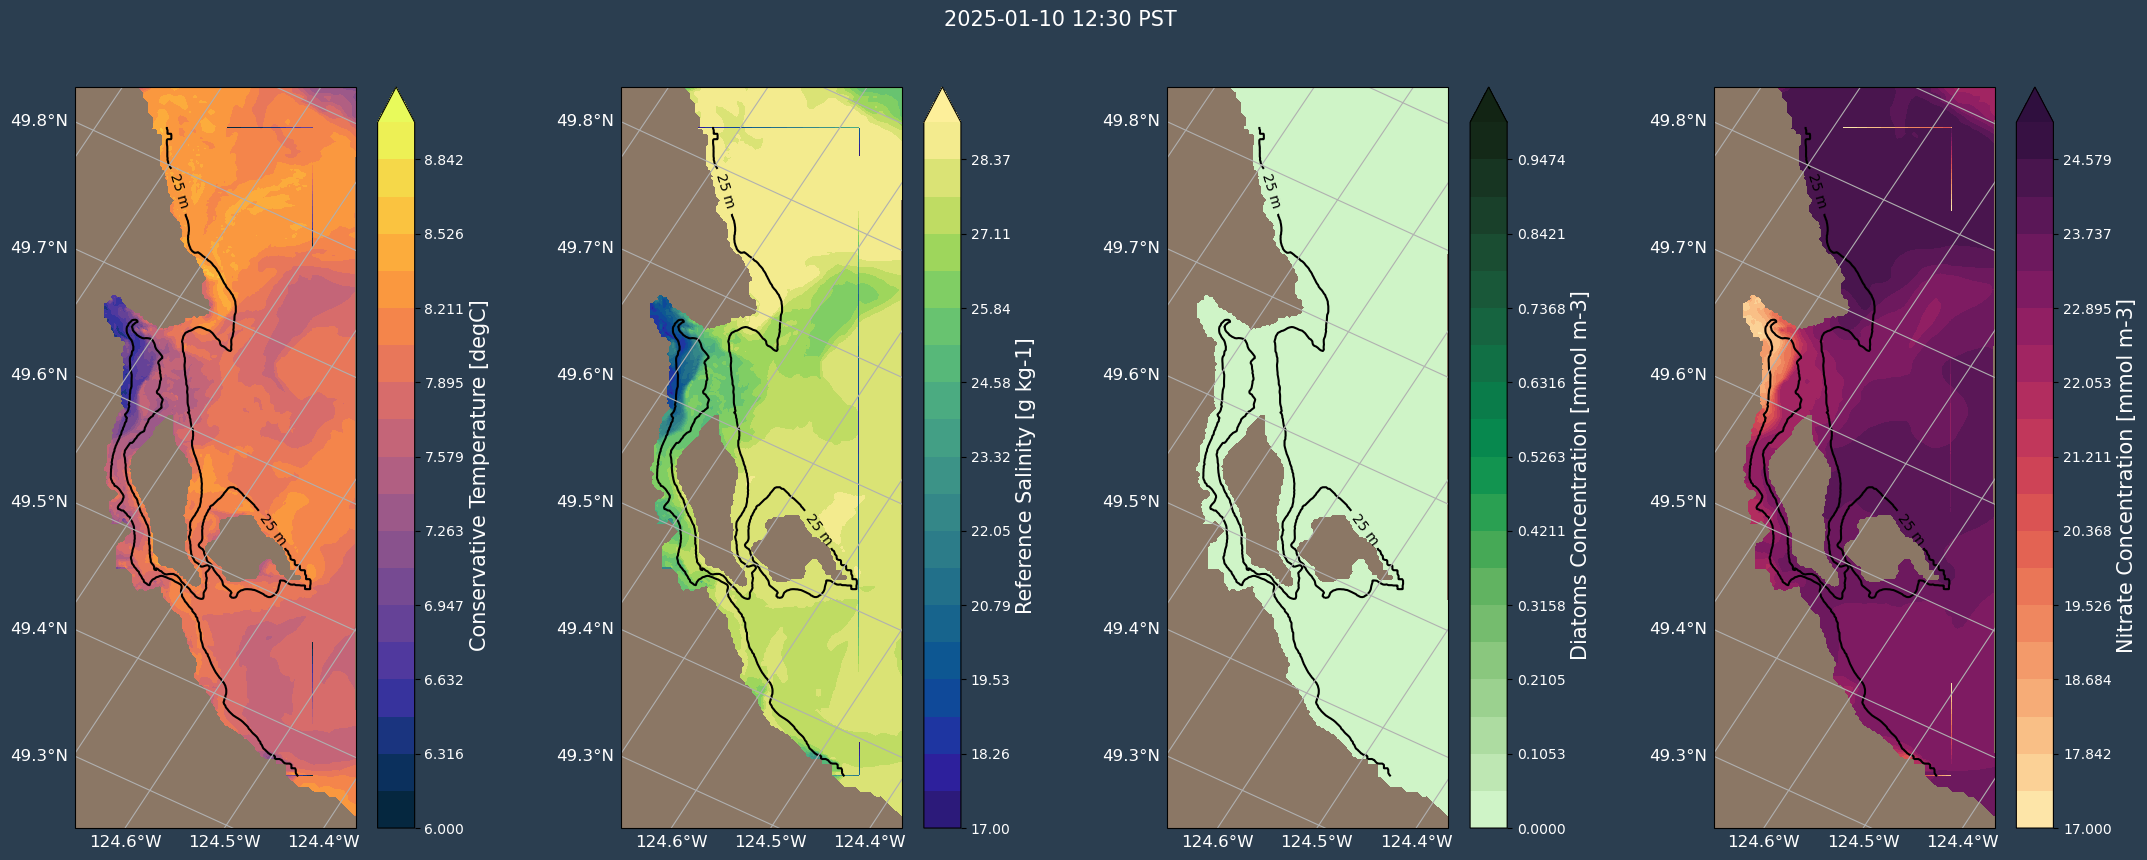

In [11]:
%%timeit -n1 -r1

reload(baynes_sound_agrif)

# Make the figure
fig = baynes_sound_agrif.make_figure(ss_tracers_path, bs_phys_path, bs_bio_path, run_date,
                                     ss_grid_path, bs_grid_path)